1. Libraries

In [11]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

2. Dataset :

   A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

   The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [6]:
#Loading data into dataframe

data = pd.read_csv("/home/anchitya-kumar/Documents/Phising_Website_Detection/Dataset/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


3. Familiarizing with Data & EDA:

   In this step, few dataframe methods are used to look into the data and its features.

In [18]:
print("Shape of the data: ", data.shape)
print("------->")
print("Columns in the data: ", data.columns)
print("------->")
print("Data types of the columns: ", data.dtypes)




Shape of the data:  (11054, 32)
------->
Columns in the data:  Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')
------->
Data types of the columns:  Index                  int64
UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort  

In [20]:
print("Missing values in the data: ", data.isnull().sum())


Missing values in the data:  Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64


In [22]:
data.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. Visualizing the data:

   Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

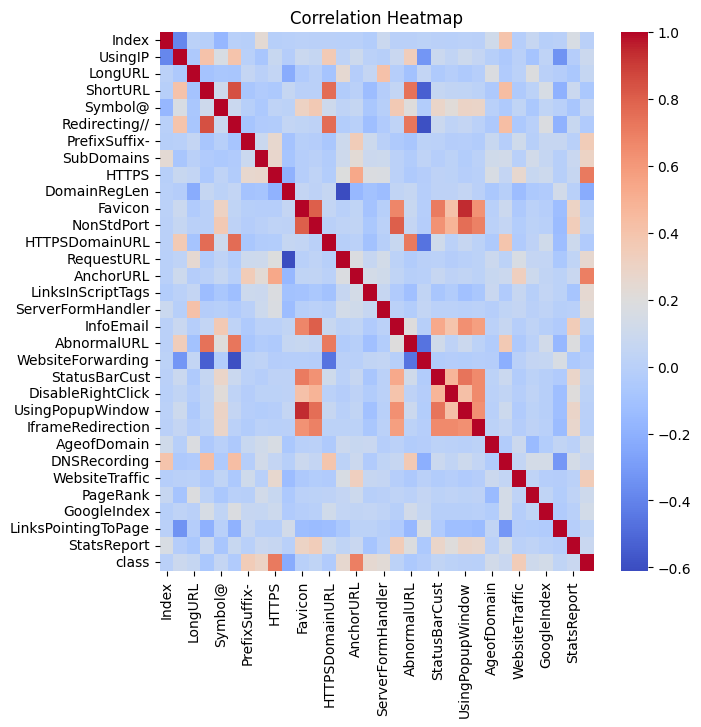

In [17]:
plt.figure(figsize =(7,7))
sns.heatmap(data.corr(), cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
selected_cols = [
    'WebsiteTraffic',
    'GoogleIndex',
    'PageRank',
    'UsingPopupWindow',
    'AbnormalURL',
    'StatusBarCust',
    'class'  # include target for hue
]




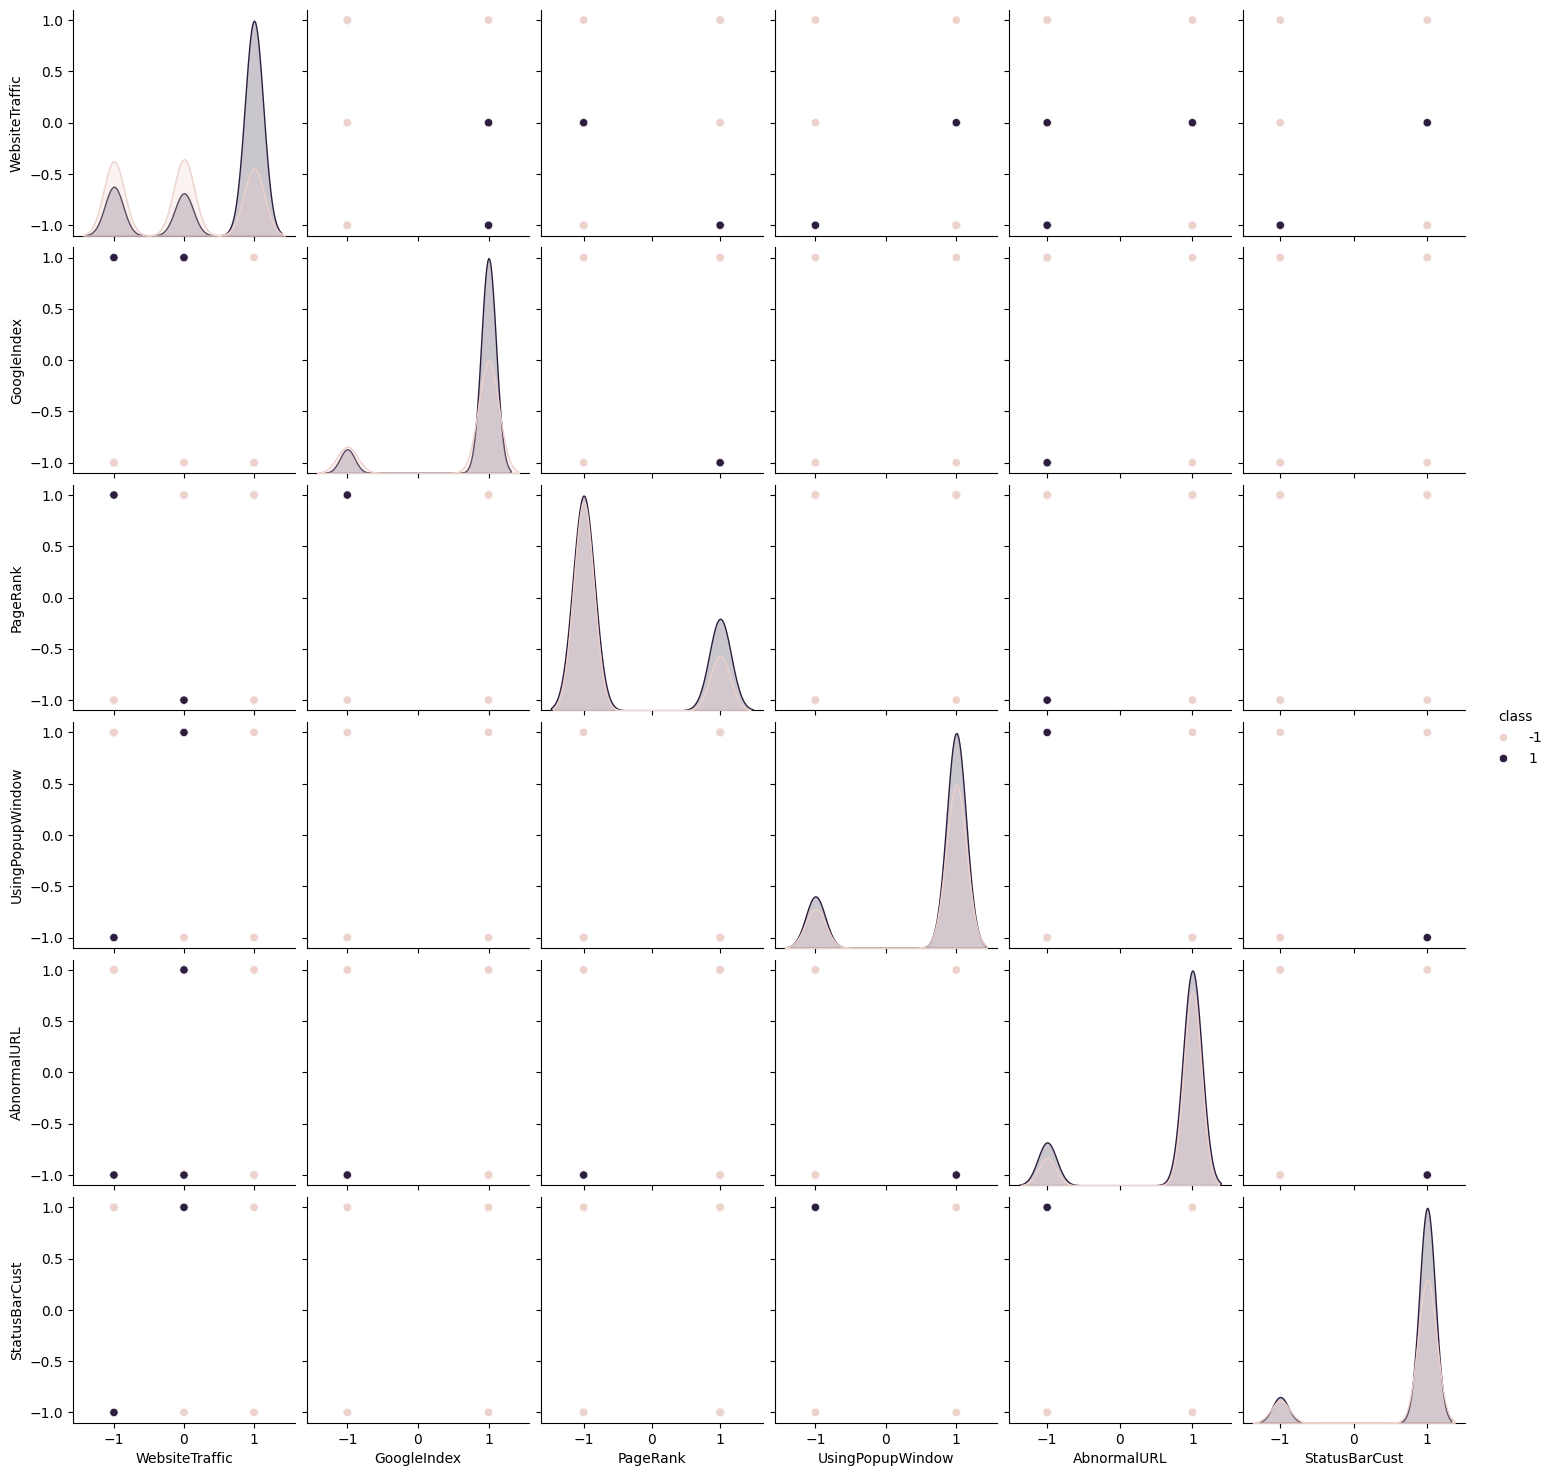

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[selected_cols], hue='class')
plt.show()

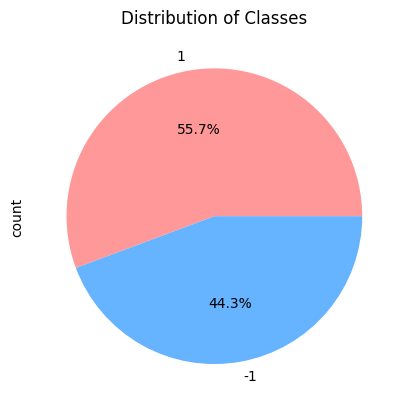

In [ ]:
# Phishing Count in pie chart
data['class'].value_counts().plot(kind='pie' ,colors = ['#ff9999','#66b3ff'] ,autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

5. Splitting the Data:

   The data is split into train & test sets, 80-20 split.

In [29]:
# Splitting the dataset into dependant and independant fetature
y = data['class']
X = data.drop('class',axis=1)
X.shape, y.shape

((11054, 31), (11054,))

In [30]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 31), (8843,), (2211, 31), (2211,))

6. Model Building & Training:

    Logistic Regression

    k-Nearest Neighbors

    Support Vector Clasifier

    Naive Bayes

    Decision Tree

    Random Forest

    Gradient Boosting

    Xgboost

    Multilayer Perceptrons

In [31]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [32]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [33]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.918
Logistic Regression : Accuracy on test Data: 0.926

Logistic Regression : f1_score on training Data: 0.927
Logistic Regression : f1_score on test Data: 0.934

Logistic Regression : Recall on training Data: 0.938
Logistic Regression : Recall on test Data: 0.941

Logistic Regression : precision on training Data: 0.917
Logistic Regression : precision on test Data: 0.928


In [35]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       976
           1       0.93      0.94      0.93      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [36]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)
# fit the model
knn.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [43]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.784
K-Nearest Neighbors : Accuracy on test Data: 0.602

K-Nearest Neighbors : f1_score on training Data: 0.808
K-Nearest Neighbors : f1_score on test Data: 0.650

K-Nearest Neighborsn : Recall on training Data: 0.818
Logistic Regression : Recall on test Data: 0.661

K-Nearest Neighbors : precision on training Data: 0.798
K-Nearest Neighbors : precision on test Data: 0.639


In [39]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.55      0.53      0.54       976
           1       0.64      0.66      0.65      1235

    accuracy                           0.60      2211
   macro avg       0.60      0.59      0.59      2211
weighted avg       0.60      0.60      0.60      2211



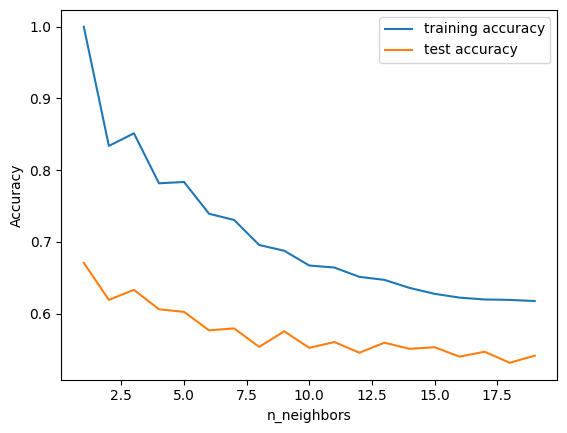

In [40]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [41]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [46]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid , cv =3 , n_jobs = -1)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [47]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [48]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.929
Support Vector Machine : Accuracy on test Data: 0.928

Support Vector Machine : f1_score on training Data: 0.937
Support Vector Machine : f1_score on test Data: 0.936

Support Vector Machine : Recall on training Data: 0.948
Support Vector Machine : Recall on test Data: 0.950

Support Vector Machine : precision on training Data: 0.926
Support Vector Machine : precision on test Data: 0.923


In [49]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.92       976
           1       0.92      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [50]:

#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)